# Cake Eating Problem

### <center> Setting </center>
##### The Bellman Equation
$$ V(x) = \max_{0\leq c \leq x} ln(c) + \beta V (x-c) $$
$$ such\ that\ c+x'= x $$

State variable : size of the cake $x$ at the start of any period

Control variable : $c$

Transition equation: $x' = x - c $

# Some points

The intertemporal problem is: how much to enjoy today and how much to leave for the future?

• Delaying consumption is costly because of the discount factor.

• But delaying some consumption is also attractive because 𝑢 is concave.

The concavity of 𝑢 implies that the consumer gains value from consumption smoothing, which
means spreading consumption out over time.





First of all, we need to install some tools in order to show the value function iteration

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from interpolation import interp
from scipy.optimize import minimize_scalar, bisect

# Value function Iteration
value function iteration can solve for "approximation" of true value function

# Algorithm

1. Initial guess : 
$$
V_0(x) = 0 \ \forall\  x\in X
$$
2. Given $ V_0(x) $ solve:
$$
V_1(x) = max \max_{0\leq x' \leq x} \left\{ln(x-x')+ \beta V_1(x')\right\}
$$

3. Continue this process

Given $ V_n $ solve: 
$$
V_{n+1} (x) = max \max_{0\leq x' \leq x} \left\{ln(x-x')+ \beta V_n(x')\right\}
$$

#### <center> STOP when  $ |V_{n+1} - V_n| < \epsilon
$ </center>

In [2]:
def maximize(g, a, b, args):
    """
    Maximize the function g over the interval [a, b].

    We use the fact that the maximizer of g on any interval is
    also the minimizer of -g.  The tuple args collects any extra
    arguments to g.

    Returns the maximal value and the maximizer.
    """

    objective = lambda x: -g(x, *args)
    result = minimize_scalar(objective, bounds=(a, b), method='bounded')
    maximizer, maximum = result.x, -result.fun
    return maximizer, maximum

In [3]:
class CakeEating:

    def __init__(self,
                 β=0.96,           # discount factor
                 x_grid_min=1e-3,  # exclude zero for numerical stability
                 x_grid_max=2.5,   # size of cake
                 x_grid_size=120):

        self.β = β

        # Set up grid
        self.x_grid = np.linspace(x_grid_min, x_grid_max, x_grid_size)

    # Utility function
    def u(self,c): #효용함수
        return np.log(c)

    # first derivative of utility function
    def u_prime(self, c):

        return c ** (-1)

    def state_action_value(self, c, x, v_array):
        """
        Right hand side of the Bellman equation given x and c.
        """

        u, β = self.u, self.β
        v = lambda x: interp(self.x_grid, v_array, x)

        return u(c) + β * v(x - c)

# Method of Successive Approximation
### Iterating with the Bellman operator
GOAL : To approximate the value function V by a sequence of successively better guess, denoted by $V^j$ at the stage $j$

Procedure :
1. stage 0 : Make an initial guess for $V$, denoted by $V^0$
2. stage 1 : Construct a revised guess for $V$, denoted by $V^1$

$$V^1(k) = \max_{k'}\ \left\{u(F(k)-k')+ \beta V^0(k')\right\} $$
...

At stage $n+1$: Compute $V^{n+1}$ given $V^n$, as follows
$$V^{n+1}(k) = \max_{k'}\ \left\{u(F(k)-k')+ \beta V^n(k')\right\} $$


This procedure can be represented much more compactly using operator notation
$$V^{n+1} = TV^n$$

In [4]:
def T(v, ce):
    """
    The Bellman operator.  Updates the guess of the value function.

    * ce is an instance of CakeEating
    * v is an array representing a guess of the value function

    """
    v_new = np.empty_like(v)

    for i, x in enumerate(ce.x_grid):
        # Maximize RHS of Bellman equation at state x
        v_new[i] = maximize(ce.state_action_value, 1e-10, x,(x, v) )[1]

    return v_new

In [5]:
ce = CakeEating()

In [6]:
x_grid = ce.x_grid
v = ce.u(x_grid)       # Initial guess
n = 12                 # Number of iterations

In [13]:
x_grid

array([1.000e-03, 2.200e-02, 4.300e-02, 6.400e-02, 8.500e-02, 1.060e-01,
       1.270e-01, 1.480e-01, 1.690e-01, 1.900e-01, 2.110e-01, 2.320e-01,
       2.530e-01, 2.740e-01, 2.950e-01, 3.160e-01, 3.370e-01, 3.580e-01,
       3.790e-01, 4.000e-01, 4.210e-01, 4.420e-01, 4.630e-01, 4.840e-01,
       5.050e-01, 5.260e-01, 5.470e-01, 5.680e-01, 5.890e-01, 6.100e-01,
       6.310e-01, 6.520e-01, 6.730e-01, 6.940e-01, 7.150e-01, 7.360e-01,
       7.570e-01, 7.780e-01, 7.990e-01, 8.200e-01, 8.410e-01, 8.620e-01,
       8.830e-01, 9.040e-01, 9.250e-01, 9.460e-01, 9.670e-01, 9.880e-01,
       1.009e+00, 1.030e+00, 1.051e+00, 1.072e+00, 1.093e+00, 1.114e+00,
       1.135e+00, 1.156e+00, 1.177e+00, 1.198e+00, 1.219e+00, 1.240e+00,
       1.261e+00, 1.282e+00, 1.303e+00, 1.324e+00, 1.345e+00, 1.366e+00,
       1.387e+00, 1.408e+00, 1.429e+00, 1.450e+00, 1.471e+00, 1.492e+00,
       1.513e+00, 1.534e+00, 1.555e+00, 1.576e+00, 1.597e+00, 1.618e+00,
       1.639e+00, 1.660e+00, 1.681e+00, 1.702e+00, 

In [8]:
v

array([-6.90775528, -3.81671283, -3.14655516, -2.7488722 , -2.46510402,
       -2.24431618, -2.06356819, -1.91054301, -1.77785656, -1.66073121,
       -1.55589715, -1.46101791, -1.37436579, -1.29462717, -1.22077992,
       -1.15201307, -1.08767235, -1.02722229, -0.97021907, -0.91629073,
       -0.86512245, -0.8164454 , -0.77002822, -0.72567037, -0.68319685,
       -0.64245407, -0.60330648, -0.56563386, -0.5293291 , -0.49429632,
       -0.46044942, -0.42771072, -0.39600995, -0.36528332, -0.33547274,
       -0.30652516, -0.27839203, -0.25102875, -0.22439433, -0.19845094,
       -0.17316362, -0.14850001, -0.12443008, -0.10092592, -0.07796154,
       -0.05551271, -0.03355678, -0.01207258,  0.00895974,  0.0295588 ,
        0.04974209,  0.06952606,  0.08892621,  0.10795714,  0.12663265,
        0.14496577,  0.16296883,  0.1806535 ,  0.19803085,  0.21511138,
        0.23190506,  0.24842136,  0.2646693 ,  0.28065746,  0.29639401,
        0.31188676,  0.32714314,  0.34217026,  0.3569749 ,  0.37

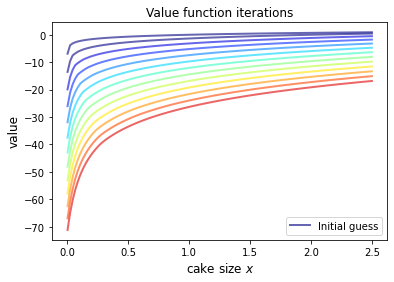

In [9]:
x_grid = ce.x_grid
v = ce.u(x_grid)       # Initial guess
n = 12                 # Number of iterations

fig, ax = plt.subplots()

ax.plot(x_grid, v, color=plt.cm.jet(0),
        lw=2, alpha=0.6, label='Initial guess')

for i in range(n):
    v = T(v, ce)  # Apply the Bellman operator
    ax.plot(x_grid, v, color=plt.cm.jet(i / n), lw=2, alpha=0.6)

ax.legend()
ax.set_ylabel('value', fontsize=12)
ax.set_xlabel('cake size $x$', fontsize=12)
ax.set_title('Value function iterations')

plt.show()

# Compute Value Function

In [10]:
def compute_value_function(ce,
                           tol=1e-4,
                           max_iter=1000,
                           verbose=True,
                           print_skip=25):

    # Set up loop
    v = np.zeros(len(ce.x_grid)) # Initial guess
    i = 0
    error = tol + 1

    while i < max_iter and error > tol:
        v_new = T(v, ce)

        error = np.max(np.abs(v - v_new))
        i += 1

        if verbose and i % print_skip == 0:
            print(f"Error at iteration {i} is {error}.")

        v = v_new

    if i == max_iter:
        print("Failed to converge!")

    if verbose and i < max_iter:
        print(f"\nConverged in {i} iterations.")

    return v_new

In [11]:
v = compute_value_function(ce)

Error at iteration 25 is 2.595068129254571.
Error at iteration 50 is 0.935254033806217.
Error at iteration 75 is 0.3370624832119802.
Error at iteration 100 is 0.12147621232560368.
Error at iteration 125 is 0.04377979998575654.
Error at iteration 150 is 0.015778321816000584.
Error at iteration 175 is 0.005686609105907792.
Error at iteration 200 is 0.0020495924617307537.
Error at iteration 225 is 0.000738776779996897.
Error at iteration 250 is 0.0002663327553165118.
Error at iteration 275 is 9.622606630443897e-05.

Converged in 275 iterations.


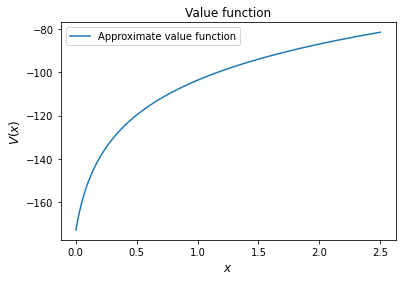

In [12]:
fig, ax = plt.subplots()

ax.plot(x_grid, v, label='Approximate value function')
ax.set_ylabel('$V(x)$', fontsize=12)
ax.set_xlabel('$x$', fontsize=12)
ax.set_title('Value function')
ax.legend()
plt.show()